In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [7]:
df =pd.read_csv("heart.csv")

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.shape

(303, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

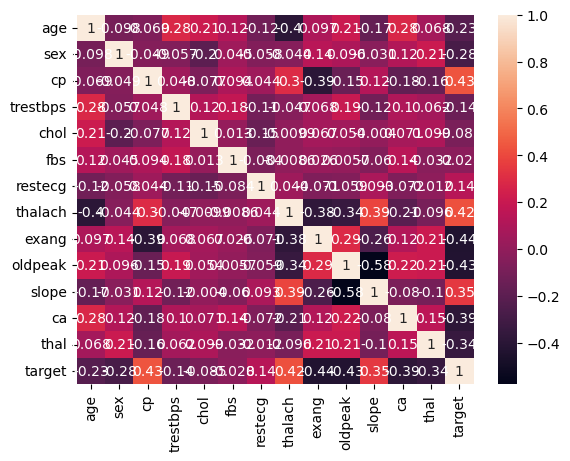

In [12]:
mat_corr = df.corr()
sns.heatmap(mat_corr,annot=True)

<Axes: >

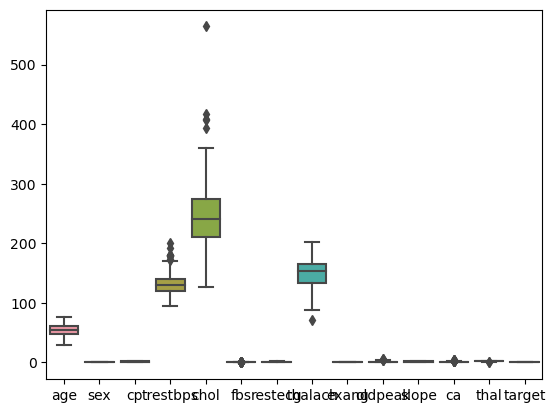

In [13]:
sns.boxplot(df)

In [15]:
y = df["target"]
X = df.iloc[:,:-1]

In [19]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)

In [29]:
print(scores.mean())

0.8216939890710384


In [30]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [43]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [46]:
best_model = grid_search.best_estimator_

In [47]:
best_model

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5, n_estimators=50)

In [48]:
accuracy = best_model.score(X_test, y_test)
print("Accuracy of best model on test set:", accuracy)

Accuracy of best model on test set: 0.8688524590163934


In [53]:
importances = model.feature_importances_

In [54]:
indices = importances.argsort()[::-1]

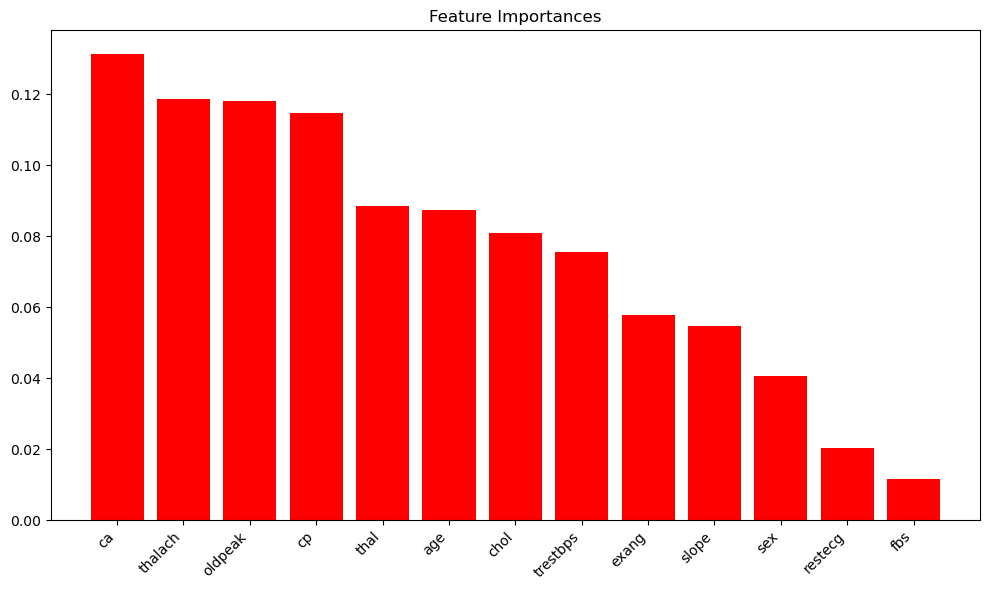

In [60]:
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha="right")
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

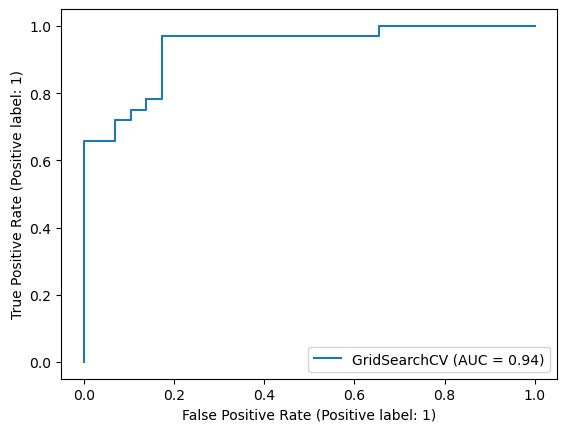

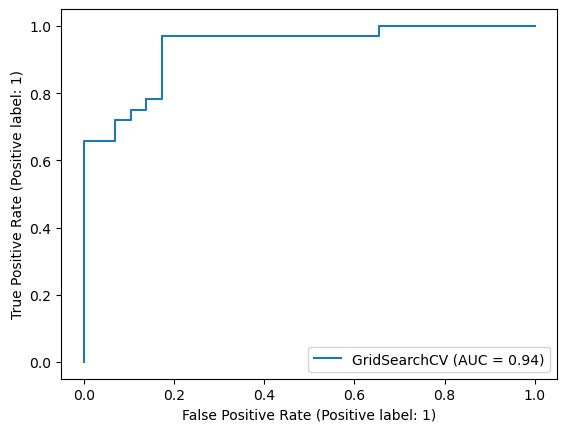

In [61]:
from sklearn.metrics import RocCurveDisplay

disp= RocCurveDisplay.from_estimator(grid_search,X_test,y_test)
disp.plot()